<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/22-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPAM CLASSIFIER**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk

In [ ]:
df=pd.read_csv("SMSSpamCollection.txt",sep='\t',names=['label','text'])

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

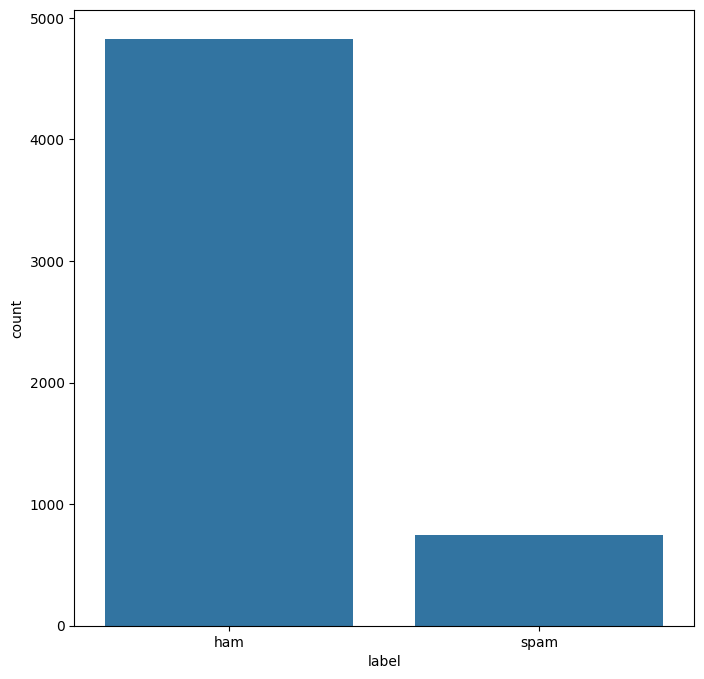

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(df,x='label')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
Stopwords=stopwords.words('english')
lemitizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def cleanData(text):
  text=re.sub("[^A-Za-z0-9]+"," ",text)
  text=text.lower()
  strr=[]
  strr=[lemitizer.lemmatize(word) for word in text.split() if word not in Stopwords]
  strr=' '.join(strr)
  return strr

In [ ]:
df['text']=df['text'].apply(cleanData)

In [ ]:
df['text'][3]

'u dun say early hor u c already say'

In [ ]:
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(df['text'])

In [ ]:
X=X.toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y=pd.get_dummies(df['label'])
Y=Y.iloc[:,1].values

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,stratify=Y)